[nltk_data] Downloading package punkt to C:\Users\FAST
[nltk_data]     LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\FAST
[nltk_data]     LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\FAST
[nltk_data]     LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14300 entries, 0 to 14299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  14299 non-null  object
 1   label    14300 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 223.6+ KB
None

Missing Values:
message    1
label      0
dtype: int64

Missing Values After Handling:
message    0
label      0
dtype: int64

Duplicate Rows:
563
Duplicate Rows After Handling: 0

Class Distribution:
label
0    11288
1     2448
Name: count, dtype: int64


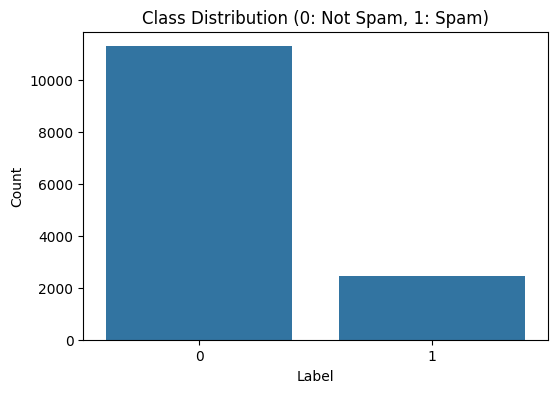


Rows with Empty Messages Removed: 13715

Sample of Cleaned Messages:
                                             message  \
0  Subject: fw : enron recruitment  vince : i ' m...   
1                                               Okie   
2  Subject: anti - aging that works . no more bot...   
3  If u sending her home first it's ok lor. I'm n...   
4  Subject: re : petrochemical forward curves  vi...   

                                     cleaned_message  
0  subject enron recruitment vince sure already a...  
1                                               okie  
2  subject anti aging work botox painful botox se...  
3                   sending home first lor ready yet  
4  subject petrochemical forward curve vince find...  

Training Set Shape: (10972,)
Testing Set Shape: (2743,)

Logistic Regression Cross-Validation Accuracy Scores: [0.95899772 0.95580866 0.96308113 0.96490428 0.95670009]
Logistic Regression Mean CV Accuracy: 0.9599
Logistic Regression Standard Deviation: 0.0035

R

c:\Users\FAST LAPTOP\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [05:38:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\FAST LAPTOP\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [05:39:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\FAST LAPTOP\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [05:39:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\FAST LAPTOP\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [05:

In [ ]:
# Import library for data manipulation in DataFrame format
import pandas as pd

# Import library for numerical operations and array handling
import numpy as np

# Import library for regular expression operations to clean text
import re

# Import library for handling and removing emojis
import emoji

# Import library for accessing English stop words
from nltk.corpus import stopwords

# Import library for splitting text into words
from nltk.tokenize import word_tokenize

# Import library for lemmatizing words
from nltk.stem import WordNetLemmatizer

# Import library for stemming words
from nltk.stem import PorterStemmer

# Import library for converting text to TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

# Import library for splitting data into train/test sets
from sklearn.model_selection import train_test_split

# Import library for performing cross-validation
from sklearn.model_selection import cross_val_score

# Import library for creating a modeling pipeline
from sklearn.pipeline import Pipeline

# Import library for Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Import library for Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Import library for XGBoost model
from xgboost import XGBClassifier

# Import library for detailed classification metrics
from sklearn.metrics import classification_report

# Import library for confusion matrix computation
from sklearn.metrics import confusion_matrix

# Import libraries for ROC curve and AUC calculation
from sklearn.metrics import roc_curve, auc

# Import library for precision-recall curve
from sklearn.metrics import precision_recall_curve

# Import library for creating plots
import matplotlib.pyplot as plt

# Import library for enhanced visualizations
import seaborn as sns

# Import library for generating word clouds
from wordcloud import WordCloud

# Import library for counting word frequencies
from collections import Counter

# Import library for saving and loading models
import joblib

# Import library for natural language processing utilities
import nltk

# Download tokenizer data for NLTK
nltk.download('punkt')

# Download stop words data for NLTK
nltk.download('stopwords')

# Download lemmatizer data for NLTK
nltk.download('wordnet')

# Set random seed for reproducibility across runs
np.random.seed(42)

# Load the dataset from CSV file into a DataFrame
df = pd.read_csv('merged_spam_dataset.csv')
df=df.sample(100)
# Display dataset structure and data types
print("Dataset Info:")
print(df.info())

# Display count of missing values per column
print("\nMissing Values:")
print(df.isnull().sum())

# Drop rows with missing message or label values
df = df.dropna(subset=['message', 'label'])

# Display updated missing values count
print("\nMissing Values After Handling:")
print(df.isnull().sum())

# Display count of duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Confirm duplicates are removed
print("Duplicate Rows After Handling:", df.duplicated().sum())

# Display counts of spam (1) and not spam (0)
print("\nClass Distribution:")
print(df['label'].value_counts())

# Create bar plot of label counts
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Class Distribution (0: Not Spam, 1: Spam)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.savefig('class_distribution.png')
plt.show()

# Define comprehensive text preprocessing function
def preprocess_text(text):
    # Convert non-string inputs to empty string
    if not isinstance(text, str):
        text = ''
    
    # Initialize lemmatizer for word normalization
    lemmatizer = WordNetLemmatizer()
    
    # Initialize stemmer for reducing words to root form
    stemmer = PorterStemmer()
    
    # Load English stop words
    stop_words = set(stopwords.words('english'))
    
    # Convert text to lowercase for consistency
    text = text.lower()
    
    # Remove email prefixes like Subject:, Re:, Fwd:
    text = re.sub(r'^(subject:|re:|fwd:)\s*', '', text, flags=re.IGNORECASE)
    
    # Remove emojis from text
    text = emoji.replace_emoji(text, replace='')
    
    # Remove URLs to eliminate web links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove email addresses to reduce noise
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove numbers to focus on textual content
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize text into words
    tokens = word_tokenize(text)
    
    # Apply lemmatization, stemming, and remove stop words
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens if word not in stop_words and len(word) > 2]
    
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    # Return None if cleaned text has fewer than 3 words
    if len(tokens) < 3:
        return None
    
    # Return cleaned text
    return cleaned_text

# Apply preprocessing to the message column
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Display number of rows before removing empty messages
print("\nRows Before Removing Empty Messages:", len(df))

# Drop rows with None or empty cleaned messages
df = df[df['cleaned_message'].notnull() & (df['cleaned_message'] != '')]

# Display number of rows after removing empty messages
print("Rows After Removing Empty Messages:", len(df))

# Display original vs cleaned text for first 5 rows
print("\nSample of Cleaned Messages:")
print(df[['message', 'cleaned_message']].head())

# Define features (cleaned text) and target (labels)
X = df['cleaned_message']
y = df['label']

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display training data dimensions
print("\nTraining Set Shape:", X_train.shape)

# Display testing data dimensions
print("Testing Set Shape:", X_test.shape)

# Create pipeline for Logistic Regression
lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Create pipeline for Random Forest
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Create pipeline for XGBoost
xgb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Store pipelines in a dictionary
pipelines = {
    'Logistic Regression': lr_pipeline,
    'Random Forest': rf_pipeline,
    'XGBoost': xgb_pipeline
}

# Initialize dictionary to store cross-validation scores
cv_scores = {}

# Perform 5-fold cross-validation for each model
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = scores
    print(f"\n{name} Cross-Validation Accuracy Scores: {scores}")
    print(f"{name} Mean CV Accuracy: {scores.mean():.4f}")
    print(f"{name} Standard Deviation: {scores.std():.4f}")

# Find model with highest mean CV accuracy
best_model_name = max(cv_scores, key=lambda x: cv_scores[x].mean())
best_pipeline = pipelines[best_model_name]
print(f"\nBest Model: {best_model_name} with Mean CV Accuracy: {cv_scores[best_model_name].mean():.4f}")

# Train the best pipeline on the full training set
best_pipeline.fit(X_train, y_train)

# Predict labels for the test set
y_pred = best_pipeline.predict(X_test)

# Display classification metrics
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()

# Compute ROC curve and AUC
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('roc_curve.png')
plt.show()

# Generate word cloud for spam emails
spam_text = ' '.join(df[df['label'] == 1]['cleaned_message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.savefig('spam_wordcloud.png')
plt.show()

# Generate word cloud for non-spam emails
non_spam_text = ' '.join(df[df['label'] == 0]['cleaned_message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_spam_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Spam Emails')
plt.savefig('non_spam_wordcloud.png')
plt.show()

# Count top 10 words in spam emails
spam_words = ' '.join(df[df['label'] == 1]['cleaned_message']).split()
spam_word_counts = Counter(spam_words)
top_spam_words = spam_word_counts.most_common(10)
words, counts = zip(*top_spam_words)
plt.figure(figsize=(8, 4))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 10 Words in Spam Emails')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.savefig('top_spam_words.png')
plt.show()

# Count top 10 words in non-spam emails
non_spam_words = ' '.join(df[df['label'] == 0]['cleaned_message']).split()
non_spam_word_counts = Counter(non_spam_words)
top_non_spam_words = non_spam_word_counts.most_common(10)
words, counts = zip(*top_non_spam_words)
plt.figure(figsize=(8, 4))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 10 Words in Non-Spam Emails')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.savefig('top_non_spam_words.png')
plt.show()

# Calculate email length for distribution plot
df['email_length'] = df['cleaned_message'].apply(len)
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='email_length', hue='label', multiple='stack')
plt.title('Email Length Distribution by Class')
plt.xlabel('Email Length (Characters)')
plt.ylabel('Count')
plt.savefig('email_length_distribution.png')
plt.show()

# Get feature importance for the best model
feature_names = best_pipeline.named_steps['tfidf'].get_feature_names_out()
coef = best_pipeline.named_steps['classifier'].coef_[0] if best_model_name == 'Logistic Regression' else best_pipeline.named_steps['classifier'].feature_importances_
top_indices = np.argsort(np.abs(coef))[-10:]
plt.figure(figsize=(8, 4))
sns.barplot(x=coef[top_indices], y=[feature_names[i] for i in top_indices])
plt.title('Top 10 TF-IDF Features by Importance')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.savefig('feature_importance.png')
plt.show()

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig('precision_recall_curve.png')
plt.show()

# Plot cross-validation scores for all models
plt.figure(figsize=(8, 4))
for name, scores in cv_scores.items():
    plt.plot(range(1, 6), scores, marker='o', label=name)
plt.title('Cross-Validation Accuracy Scores by Model')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('cv_scores.png')
plt.show()

# Save the best pipeline to file
joblib.dump(best_pipeline, 'spam_classifier_pipeline.pkl')

# Confirm model saving
print("\nBest Pipeline Saved Successfully.")